In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('datasets_Life Expectancy Data_No_blanks.csv')
df.head(20)
dataset =  df
print(dataset.values)


[['Afghanistan' 2015 'Developing' ... 0.479 10.1 0]
 ['Afghanistan' 2014 'Developing' ... 0.47600000000000003 10.0 0]
 ['Afghanistan' 2013 'Developing' ... 0.47 9.9 0]
 ...
 ['Zimbabwe' 2002 'Developing' ... 0.42700000000000005 10.0 0]
 ['Zimbabwe' 2001 'Developing' ... 0.42700000000000005 9.8 0]
 ['Zimbabwe' 2000 'Developing' ... 0.434 9.8 0]]


In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
#X = np.array(ct.fit_transform(df), dtype= object)
#print(X)
df["Country"]= df["Country"].astype('category')
df.dtypes
df["Status"]= df["Status"].astype('category')
df.dtypes
df["Country"]= df["Country"].cat.codes
df["Status"]= df["Status"].cat.codes
#for i in range(20,60,1):
#    print(df.iloc[i,[0,22]],df.iloc[i,[2,23]])
#print(df.iloc[0:20,[0,22]],'\n\n',df.iloc[0:20,[2,23]])

In [4]:
df.describe()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Unnamed: 22
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,...,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000,1649.0
mean,66.193451,2007.840509,0.853244,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,...,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891,0.0
std,38.892006,4.087711,0.353969,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,...,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388,0.0
min,0.000000,2000.000000,0.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,...,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000,0.0
25%,32.000000,2005.000000,1.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,...,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000,0.0
50%,67.000000,2008.000000,1.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,...,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000,0.0
75%,100.000000,2011.000000,1.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,...,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000,0.0
max,132.000000,2015.000000,1.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,...,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   int16  
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   int8   
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [6]:
X=dataset.iloc[:,2:]
y=dataset.iloc[:,3]
print (X)



      Status  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0          1              65.0              263             62     0.01   
1          1              59.9              271             64     0.01   
2          1              59.9              268             66     0.01   
3          1              59.5              272             69     0.01   
4          1              59.2              275             71     0.01   
...      ...               ...              ...            ...      ...   
1644       1              44.3              723             27     4.36   
1645       1              44.5              715             26     4.06   
1646       1              44.8               73             25     4.43   
1647       1              45.3              686             25     1.72   
1648       1              46.0              665             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         

In [7]:

from sklearn.preprocessing import MinMaxScaler

x = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

print(df)

       0         1         2         3         4         5         6   \
0     1.0  0.466667  0.362881  0.038750  0.000000  0.003759  0.649485   
1     1.0  0.353333  0.373961  0.040000  0.000000  0.003878  0.618557   
2     1.0  0.353333  0.369806  0.041250  0.000000  0.003861  0.639175   
3     1.0  0.344444  0.375346  0.043125  0.000000  0.004123  0.670103   
4     1.0  0.337778  0.379501  0.044375  0.000000  0.000374  0.680412   
...   ...       ...       ...       ...       ...       ...       ...   
1644  1.0  0.006667  1.000000  0.016875  0.243561  0.000000  0.680412   
1645  1.0  0.011111  0.988920  0.016250  0.226764  0.000000  0.051546   
1646  1.0  0.017778  0.099723  0.015625  0.247480  0.000000  0.731959   
1647  1.0  0.028889  0.948753  0.015625  0.095745  0.000000  0.762887   
1648  1.0  0.044444  0.919668  0.015000  0.093505  0.000000  0.793814   

            7         8         9   ...        11        12        13  \
0     0.008780  0.227696  0.039524  ...  0.543590 

In [8]:
# What is the correlation between variables?

correlation=X.corr(method='pearson')
print(correlation)

                                   Status  Life expectancy   Adult Mortality  \
Status                           1.000000         -0.442798         0.278173   
Life expectancy                 -0.442798          1.000000        -0.702523   
Adult Mortality                  0.278173         -0.702523         1.000000   
infant deaths                    0.108757         -0.169074         0.042450   
Alcohol                         -0.607782          0.402718        -0.175535   
percentage expenditure          -0.461688          0.409631        -0.237610   
Hepatitis B                     -0.140351          0.199935        -0.105225   
Measles                          0.071963         -0.068881        -0.003967   
 BMI                            -0.298380          0.542042        -0.351542   
under-five deaths                0.109847         -0.192265         0.060365   
Polio                           -0.201917          0.327294        -0.199853   
Total expenditure               -0.19253

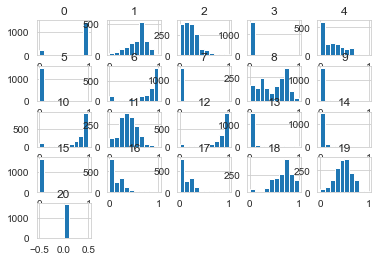

In [9]:
#There are various kinds of visualizations we can try with python..We already 
#saw scatter and line plots.. Lets look at histograms 
#Histograms
from matplotlib import pyplot
df.hist()
pyplot.show()

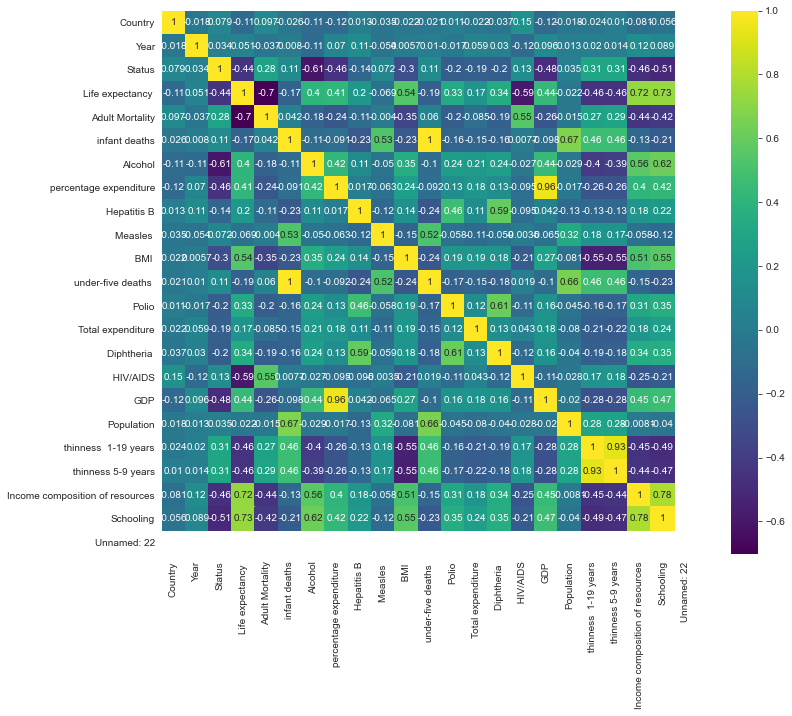

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),cmap='viridis',annot=True)